In [1]:
import mlrun

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
project = mlrun.new_project('from-git',init_git=True)

The pull_at_runtime flag will determine if the code is loaded in runtime or added to the image during build. the first (at runtime) option is better for debugging while the secound is better for production. Note that if you choose the 2nd option you'll need to build the function before run.

In [3]:
source = 'git://github.com/GiladShapira94/load-project-example.git'

In [4]:
project.set_source(source=source,pull_at_runtime=True)

In [5]:
project.set_function(name='nuclio',handler='multi:multi_3',kind='nuclio',image='mlrun/mlrun',with_repo=True)

In [6]:
project.set_function(name='my_job',handler='my_job.func',kind='job',image='mlrun/mlrun',with_repo=True)

New function method allow you to Create a new ML function from base properties 

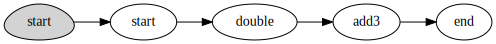

In [7]:
# define a serving graph function with 3 steps (*2, +3, echo)
serving = mlrun.new_function("serving", kind="serving", image="mlrun/mlrun")
graph = serving.set_topology("flow")
graph.to(name="start", handler="serving.start") \
     .to(name="double", handler="serving.double")\
     .to(name="add3", handler="serving.add3") \
     .to(name="end", handler="serving.end").respond()

# plot the serving graph
serving.spec.graph.plot(rankdir="LR")

In [8]:
# save the function definition into a .yaml file and register it in the project
serving.export("serving.yaml")
project.set_function("serving.yaml", name="serving", with_repo=True)

> 2022-07-24 12:19:50,548 [info] function spec saved to path: serving.yaml


In [9]:
project.save()